In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
with open('/home/mladen/Strainr/raw_results.pkl','rb') as ph:
        ab = pickle.load(ph)

In [3]:
with open('/home/mladen/Strainr/total_hits.pkl','rb') as ph:
        final_hits = pickle.load(ph)

In [4]:
cols=['GCA_000012185.1', 'GCA_000016465.1', 'GCA_000016485.1', 'GCA_000027305.1', 'GCA_000165525.1', 'GCA_000165575.1', 'GCA_000197875.1', 'GCA_000200475.1', 'GCA_000210875.1', 'GCA_000465255.1', 'GCA_000698365.1', 'GCA_000767075.1', 'GCA_000931575.1', 'GCA_000931605.1', 'GCA_000931625.1', 'GCA_000968335.1', 'GCA_001457655.1', 'GCA_001856725.1', 'GCA_002073475.2', 'GCA_002966575.1', 'GCA_002966595.1', 'GCA_002966615.1', 'GCA_002966635.1', 'GCA_002966655.1', 'GCA_002966675.1', 'GCA_002966695.1', 'GCA_002966715.1', 'GCA_002966735.1', 'GCA_003184385.1', 'GCA_003184405.1', 'GCA_003351425.1', 'GCA_003351445.1', 'GCA_003351465.1', 'GCA_003351585.1', 'GCA_003351605.1', 'GCA_003352345.1', 'GCA_003352365.1', 'GCA_003352405.1', 'GCA_003425445.1', 'GCA_003425465.1', 'GCA_003425485.1', 'GCA_003425505.1', 'GCA_003425525.1', 'GCA_003425565.1', 'GCA_003425585.1', 'GCA_003425605.1', 'GCA_003425625.1', 'GCA_003425645.1', 'GCA_003425715.1', 'GCA_003425765.1', 'GCA_003425815.1', 'GCA_003425935.1', 'GCA_003425955.1', 'GCA_008586745.1', 'GCA_008586765.1', 'GCA_008586785.1', 'GCA_008586805.1', 'GCA_008586825.1', 'GCA_008831525.1', 'GCA_013394405.1', 'GCA_014701215.1', 'GCA_014931495.1', 'GCA_016861285.1', 'GCA_900475535.1', 'GCA_900475755.1', 'GCA_900475995.1', 'GCA_900478275.1', 'GCA_900478325.1', 'GCA_900478735.1', 'GCA_900635795.1', 'GCA_900635805.1', 'GCA_900638105.1', 'GCA_901472485.1']

In [5]:
raw= dict(ab)
df = pd.DataFrame.from_dict(raw,orient='index',columns=cols).astype(int)
final_names = {k:cols[int(v)] for k,v in final_hits.items() if v != 'NA'}
ss = pd.Series(final_names).rename('final')
df = df.join(ss)

In [6]:
df.sample(3)

,GCA_000012185.1,GCA_000016465.1,GCA_000016485.1,GCA_000027305.1,GCA_000165525.1,GCA_000165575.1,GCA_000197875.1,GCA_000200475.1,GCA_000210875.1,GCA_000465255.1,...,GCA_900475755.1,GCA_900475995.1,GCA_900478275.1,GCA_900478325.1,GCA_900478735.1,GCA_900635795.1,GCA_900635805.1,GCA_900638105.1,GCA_901472485.1,final
NC_000907.1_1531_47/1,10,0,10,96,0,0,0,0,4,16,...,0,0,0,0,0,0,0,0,0,GCA_000027305.1
NC_014920.1_2896_19/1,0,88,0,65,96,96,96,65,39,52,...,0,88,0,88,0,0,96,96,0,GCA_000698365.1
NC_000907.1_2173_44/1,0,32,96,96,0,65,0,0,29,96,...,0,65,0,29,0,0,48,0,0,GCA_000027305.1


In [27]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df[df.notna()]
X = df.iloc[:,0:-1]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range#apply SelectKBest class to extract top 10 best features
X = X[y.notna()]
y = y[y.notna()]

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

              Specs         Score
3   GCA_000027305.1  1.545169e+07
1   GCA_000016465.1  1.076841e+07
15  GCA_000968335.1  1.011203e+07
40  GCA_003425485.1  1.007569e+07
10  GCA_000698365.1  9.412781e+06
6   GCA_000197875.1  8.569844e+06
57  GCA_008586825.1  7.193103e+06
17  GCA_001856725.1  6.453646e+06
32  GCA_003351465.1  6.339845e+06
13  GCA_000931605.1  6.146276e+06


[0.00784664 0.05612398 0.01251677 0.15406815 0.0058453  0.00694469
 0.09857054 0.0076605  0.01774895 0.00614214 0.11496839 0.00462013
 0.00810514 0.00920868 0.00290461 0.04120948 0.00471717 0.01659106
 0.00776221 0.00540655 0.00724362 0.01010008 0.00836667 0.0080583
 0.00577764 0.00661018 0.00503602 0.01076576 0.00703014 0.00627252
 0.00489792 0.00434748 0.01339539 0.0043478  0.00448969 0.00481971
 0.00623354 0.00476501 0.00426055 0.00559134 0.05561434 0.00392849
 0.00518739 0.00368849 0.00262568 0.00370598 0.00494116 0.00587305
 0.00277544 0.00610359 0.00414299 0.00408842 0.00539265 0.00682454
 0.00692254 0.00750818 0.00643314 0.06773146 0.00392025 0.00485241
 0.00470081 0.00515546 0.00392108 0.00534166 0.00499435 0.00360846
 0.00547407 0.00423147 0.00468511 0.00803998 0.00590434 0.00550268
 0.0048099 ]


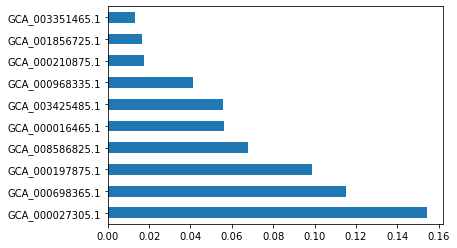

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

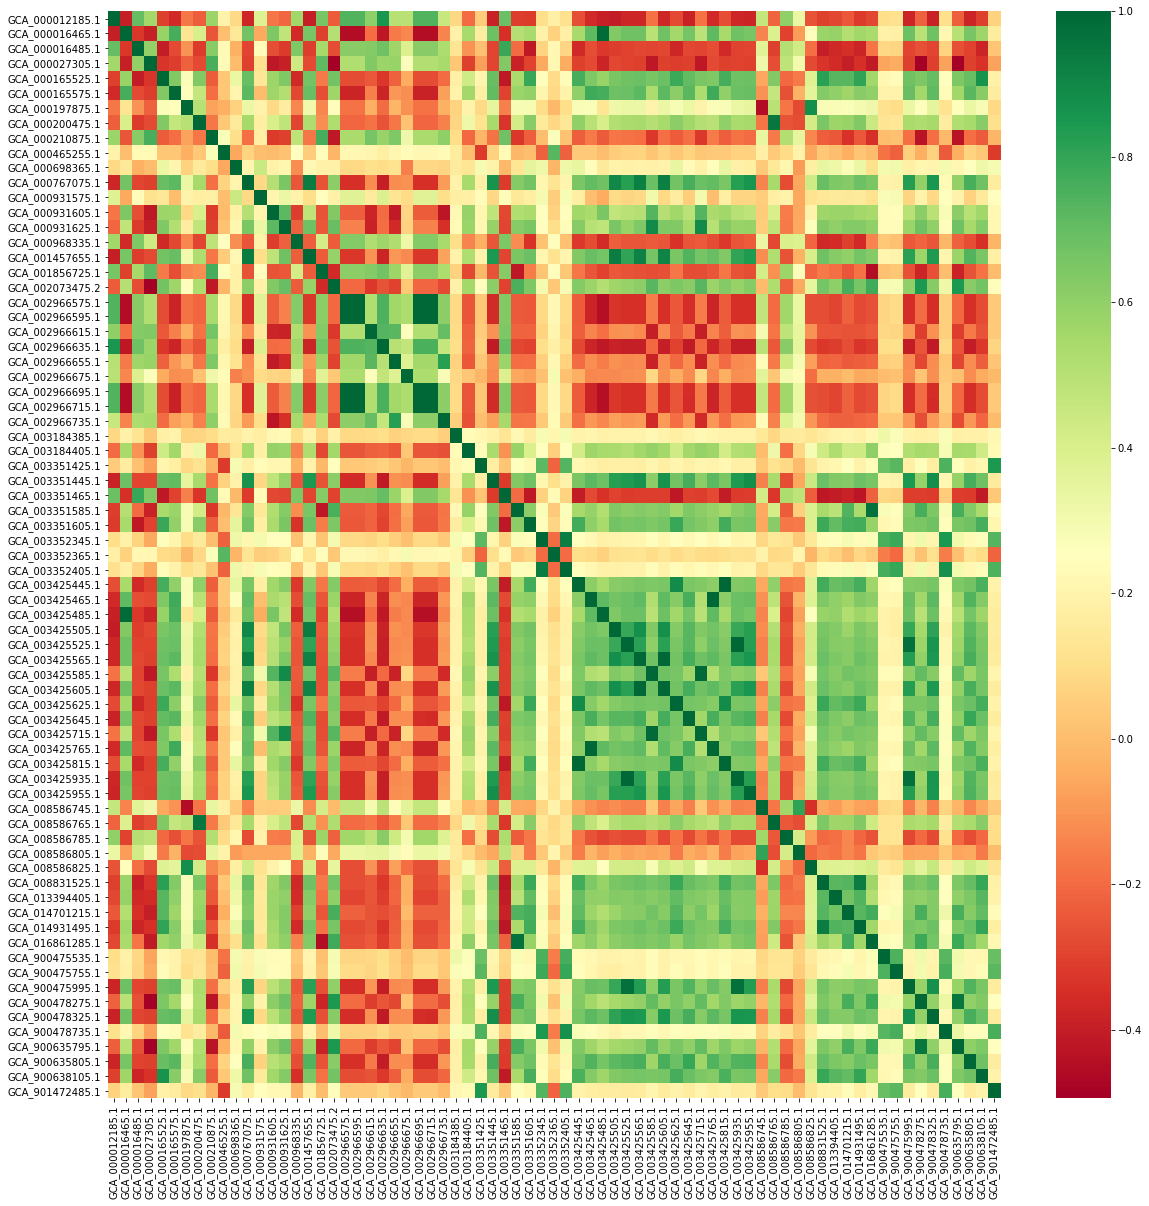

In [30]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),cmap="RdYlGn")

In [20]:
y[y.notna()]

NC_009566.1_0_0/1         GCA_000016465.1
NC_009566.1_1_0/1         GCA_000016465.1
NC_009566.1_2_0/1         GCA_000016465.1
NC_009566.1_3_0/1         GCA_000016465.1
NC_009566.1_4_0/1         GCA_000027305.1
                               ...       
NZ_CP008740.1_674_47/1    GCA_000968335.1
NZ_CP008740.1_675_47/1    GCA_000968335.1
NZ_CP008740.1_676_47/1    GCA_000968335.1
NZ_CP008740.1_677_47/1    GCA_000968335.1
NZ_CP008740.1_678_47/1    GCA_000968335.1
Name: final, Length: 499972, dtype: object

In [8]:
a = np.full(10,np.nan)
a

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])